# MOVIE REVIEW ANALYSIS -Team 09

### PROJECT GUIDE 
   * P.GOPAL KRISHNA
   
### TEAM MEMBERS
   * RAGHU POLA
   * PREM KUMAR
   * BHARATH
   * RYAN ROHAN
   

# --------------------------------------------------------------------------------------------------------------

## Importing all the required libraries 

In [1]:

import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

# --------------------------------------------------------------------------------------------------------------

# Getting the data for training and testing

## training Data
* the training data consist of 25,000 different reviews 
* it has 3 columns such as 
* 
 1. Id
 2. Sentiment(1 or 0)
 3. review data

In [2]:
path = 'review_train.tsv'
data = pd.read_table(path,header=None,skiprows=1,names=['Sentiment','Review'])
X = data.Review
y = data.Sentiment

train = pd.read_csv("review_train.tsv", delimiter="\t")
test = pd.read_csv("review_test.tsv", delimiter="\t")

In [3]:
X.head(1)

5814_8    With all this stuff going down at the moment w...
Name: Review, dtype: object

# --------------------------------------------------------------------------------------------------------------

# Using CountVectorizer to convert text into tokens/features

In [4]:
vect = CountVectorizer(stop_words='english', ngram_range = (1,1), max_df = .80, min_df = 4)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size= 0.2)

In [5]:
X_train.head()

8746_2     Obvious attack on Microsoft made by people who...
1741_9     This is a dramatic film in the whole sense of ...
2430_10    This a Casper the Friendly Ghost short from my...
8797_8     A great idea: 11 stories about 11 September. 1...
799_2      In some ways, the concept behind the storyline...
Name: Review, dtype: object

# --------------------------------------------------------------------------------------------------------------

# Using training data to transform text into counts of features for each message

In [6]:

vect.fit(X_train)
X_train_dtm = vect.transform(X_train) 
X_test_dtm = vect.transform(X_test)


In [7]:
print(X_train_dtm.shape)
print(X_train_dtm.dtype)
print(X_train_dtm.toarray())

#print(vect.vocabulary_)

(20000, 27466)
int64
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# --------------------------------------------------------------------------------------------------------------

# Buliding different classification models for classifying the review

### List of classifier used are 
1. Navie-Bayes model
2. Logistic Regression
3. Support Vector Machine
4. K-nearest neighbourhood 

# --------------------------------------------------------------------------------------------------------------

# 1.NAVIE BAYES MODEL

 ### Steps invovles 
 * Creating the model
 * Training the model
 * Testing the Model
 * Displaying the Accuracy of the Model

In [8]:
# Declaringing and training the model
NB = MultinomialNB()
NB.fit(X_train_dtm, y_train)
y_pred = NB.predict(X_test_dtm)

naive_accuracy = metrics.accuracy_score(y_test,y_pred)*100

In [9]:
#Accuracy using Naive Bayes Model

print('\n "***************"    Naive Bayes    "**************"\n')
print('\t\tAccuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
#print('\t\tConfusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')


 "***************"    Naive Bayes    "**************"

		Accuracy Score: 85.72%


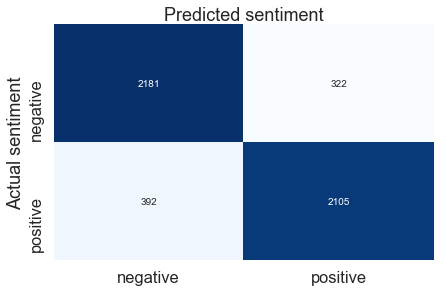

In [10]:
cnf_matrix_navie = metrics.confusion_matrix(y_test,y_pred)

class_names = ["negative", "positive"]
fig,ax = plt.subplots()


sns.heatmap(pd.DataFrame(cnf_matrix_navie), annot=True, cmap="Blues", fmt="d", cbar=False, xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual sentiment')
plt.xlabel('Predicted sentiment');

# --------------------------------------------------------------------------------------------------------------

# 2.LOGISTIC REGRESSION

 ### Steps invovles 
 * Creating the model
 * Training the model
 * Testing the Model
 * Displaying the Accuracy of the Model

In [11]:
#Accuracy using Logistic Regression Model
LR = LogisticRegression()
LR.fit(X_train_dtm, y_train)
y_pred = LR.predict(X_test_dtm)

log_accuracy = metrics.accuracy_score(y_test,y_pred)*100

print('\n "***************"    Logistic Regression     "****************"\n')
print('\t\tAccuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
#print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')


 "***************"    Logistic Regression     "****************"

		Accuracy Score: 87.3%


C:\Users\Jarup\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


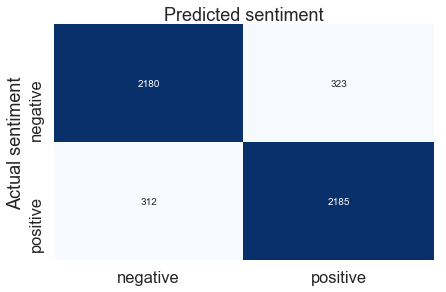

In [12]:
cnf_matrix_log = metrics.confusion_matrix(y_test,y_pred)

class_names = ["negative", "positive"]
fig,ax = plt.subplots()


sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True, cmap="Blues", fmt="d", cbar=False, xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual sentiment')
plt.xlabel('Predicted sentiment');

# --------------------------------------------------------------------------------------------------------------

# 1.SUPPORT VECTOR MACHINE

 ### Steps invovles 
 * Creating the model
 * Training the model
 * Testing the Model
 * Displaying the Accuracy of the Model

In [13]:
#Accuracy using SVM Model
SVM = LinearSVC()
SVM.fit(X_train_dtm, y_train)
y_pred = SVM.predict(X_test_dtm)

svm_accuracy =  metrics.accuracy_score(y_test,y_pred)*100

print('\n "************" \t Support Vector Machine \t "*************" \n')
print('\t\t\tAccuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
#print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')


 "************" 	 Support Vector Machine 	 "*************" 

			Accuracy Score: 85.32%


C:\Users\Jarup\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


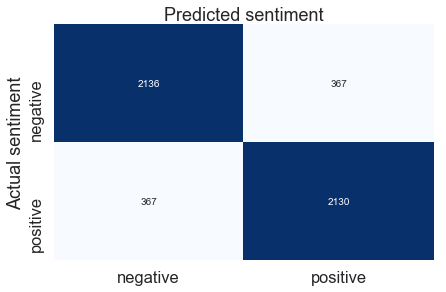

In [14]:
cnf_matrix_svm = metrics.confusion_matrix(y_test,y_pred)

class_names = ["negative", "positive"]
fig,ax = plt.subplots()


sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True, cmap="Blues", fmt="d", cbar=False, xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual sentiment')
plt.xlabel('Predicted sentiment');

# --------------------------------------------------------------------------------------------------------------

# 1.K-NEAREST NEIGHBOURHOOD

 ### Steps invovles 
 * Creating the model
 * Training the model
 * Testing the Model
 * Displaying the Accuracy of the Model

In [15]:
#Accuracy using KNN Model
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train_dtm, y_train)
y_pred = KNN.predict(X_test_dtm)

knn_accuracy = metrics.accuracy_score(y_test,y_pred)*100

print('\n "*****************" \t K Nearest Neighbors (NN = 3) \t "********************" \n')
print('\t\t\t Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
#print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')


 "*****************" 	 K Nearest Neighbors (NN = 3) 	 "********************" 

			 Accuracy Score: 58.040000000000006%


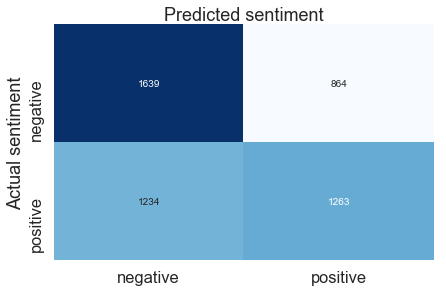

In [16]:
cnf_matrix_knn = metrics.confusion_matrix(y_test,y_pred)

class_names = ["negative", "positive"]
fig,ax = plt.subplots()


sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True, cmap="Blues", fmt="d", cbar=False, xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual sentiment')
plt.xlabel('Predicted sentiment');

# --------------------------------------------------------------------------------------------------------------

# Comparing the accurary of the model using a pie chart

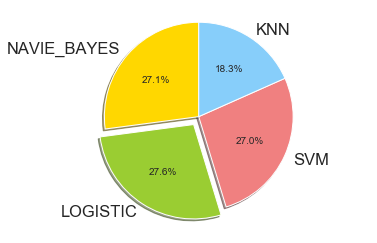

In [17]:
labels = 'NAVIE_BAYES', 'LOGISTIC', 'SVM', 'KNN'

sizes = [naive_accuracy, log_accuracy ,svm_accuracy, knn_accuracy]

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

# --------------------------------------------------------------------------------------------------------------

# Using Navie -Bayes for Analysis

In [18]:
#Naive Bayes Analysis
tokens_words = vect.get_feature_names()
print('\nAnalysis')
print('No. of tokens: ',len(tokens_words))
counts = NB.feature_count_
df_table = {'Token':tokens_words,'Negative': counts[0,:],'Positive': counts[1,:]}
tokens = pd.DataFrame(df_table, columns= ['Token','Positive','Negative'])
positives = len(tokens[tokens['Positive']>tokens['Negative']])
negatives = len(tokens_words)-positives
print('No. of positive tokens: ',positives)
print('No. of negative tokens: ',len(tokens_words)-positives)



Analysis
No. of tokens:  27466
No. of positive tokens:  14360
No. of negative tokens:  13106


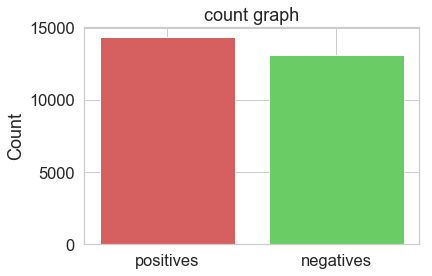

In [ ]:
data = [positives,negatives]
labels = ['positives','negatives']

ind = np.arange(2) 
width = 0.25       

plt.ylabel('Count')
plt.title("count graph")

plt.bar(ind, data, align='center',color = ['r','g'])
plt.xticks(ind,labels)

plt.show()

In [ ]:
#Check positivity/negativity of specific tokens
token_search = ['awesome']
print('\nSearch Results for token/s:',token_search)
print(tokens.loc[tokens['Token'].isin(token_search)])


Search Results for token/s: ['awesome']
        Token  Positive  Negative
1895  awesome     298.0     104.0


In [ ]:
#Analyse False Negatives (Actual: 1; Predicted: 0)(Predicted negative review for a positive review) 
#print(X_test[ y_pred < y_test ])

In [ ]:
#Analyse False Positives (Actual: 0; Predicted: 1)(Predicted positive review for a negative review) 
#print(X_test[ y_pred > y_test ])

# --------------------------------------------------------------------------------------------------------------

# User Review Analysis using Logistic Regression

#### Here we take input from the user and then make analysis of that review 

In [ ]:
#Custom Test: Test a review on the best performing model (Logistic Regression)
trainingVector = CountVectorizer(stop_words='english', ngram_range = (1,1), max_df = .80, min_df = 5)
trainingVector.fit(X)
X_dtm = trainingVector.transform(X)
LR_complete = LogisticRegression()
LR_complete.fit(X_dtm, y)
print("")

C:\Users\Jarup\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Input Review
print('\nTest a custom review message')
print('Enter review to be analysed: ', end=" ")
test = []
test.append(input())
test_dtm = trainingVector.transform(test)
predLabel = LR_complete.predict(test_dtm)
tags = ['Negative','Positive']


Test a custom review message
Enter review to be analysed:  

In [ ]:
#Display Output
print('The review is predicted',tags[predLabel[0]])


# --------------------------------------------------------------------------------------------------------------